<a href="https://colab.research.google.com/github/shubham151/UCAdmissionAnalytics/blob/main/UCAdmissionStats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages(c("tidyverse", "lubridate", "ggplot2", "rtweet", "maps", "mapdata", "scales", "tm", "wordcloud", "RColorBrewer", "syuzhet", "caret"))


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘NLP’, ‘Rcpp’, ‘slam’, ‘BH’, ‘textshape’, ‘zoo’, ‘dtt’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




Load Necessary Libraries

In [27]:
library(readr)
library(dplyr)
library(ggplot2)
library(tidyr)


In [30]:
hs_data <- read.csv("/content/HS_by_Year_data.csv")
gpa_data <- read.csv("/content/FR_GPA_by_Inst_data.csv")



In [31]:
colnames(hs_data)

[1] "Calculation1"            "Campus"                 
[3] "City"                    "County.State..Territory"
[5] "Fall.Term"               "Measure.Names"          
[7] "School.Name"             "Uad.Uc.Ethn.6.Cat"      
[9] "Measure.Values"

In [55]:

head(hs_data)
head(gpa_data)

,Calculation1,Campus,City,County.State..Territory,Fall.Term,Measure.Names,School.Name,Uad.Uc.Ethn.6.Cat,Measure.Values
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>
1,,Universitywide,,Not Applicable,2009,enr,,Domestic Unknown,4
2,,Universitywide,,Not Applicable,2009,adm,,Domestic Unknown,6
3,,Universitywide,,Not Applicable,2009,app,,Domestic Unknown,6
4,,Universitywide,,Not Applicable,2009,enr,,White,6
5,,Universitywide,,Not Applicable,2009,adm,,White,10
6,,Universitywide,,Not Applicable,2009,app,,White,17


,Calculation1,Campus,City,County,Fall.Term,Measure.Names,School.Name,Measure.Values
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>
1,,Universitywide,Apple Valley,San Bernardino,2007,Enrl GPA,,NA
2,,Universitywide,Apple Valley,San Bernardino,2007,Adm GPA,,3.986667
3,,Universitywide,Apple Valley,San Bernardino,2007,App GPA,,3.845714
4,,Irvine,Apple Valley,San Bernardino,2006,Enrl GPA,,NA
5,,Universitywide,Apple Valley,San Bernardino,2006,Enrl GPA,,NA
6,,Irvine,Apple Valley,San Bernardino,2006,Adm GPA,,NA


In [56]:
applications_over_time <- hs_data %>%
  filter(Measure.Names == "app") %>%
  group_by(Fall.Term) %>%
  summarise(TotalApplications = sum(Measure.Values))


Total Application Over Time

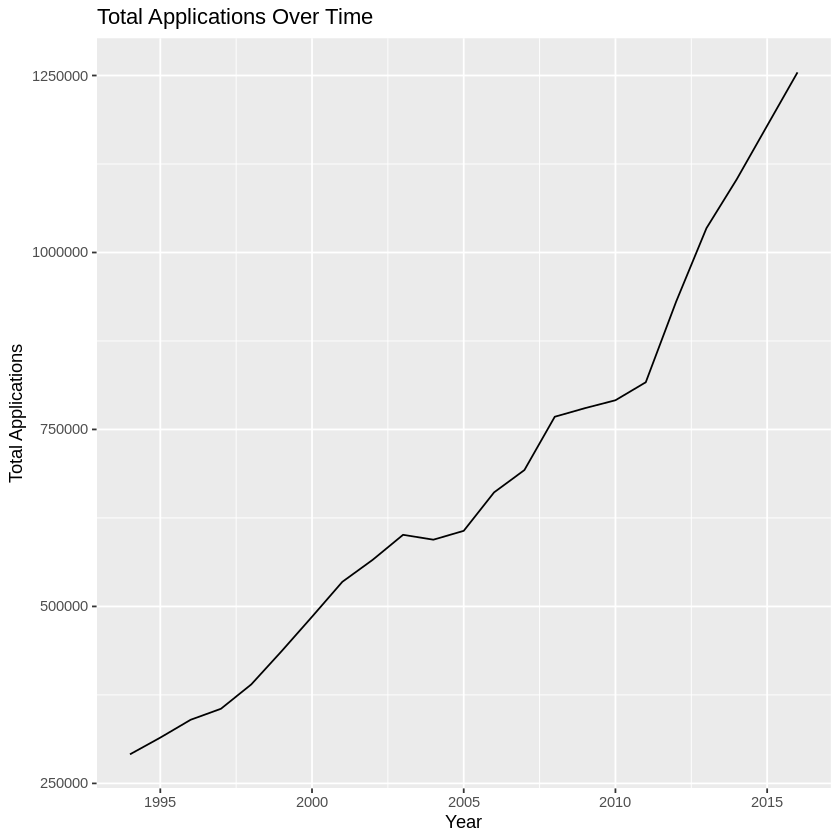

In [37]:
ggplot(applications_over_time, aes(x = Fall.Term, y = TotalApplications)) +
  geom_line() +
  labs(title = "Total Applications Over Time", x = "Year", y = "Total Applications")


In [ ]:
gpa_by_campus <- gpa_data %>%
  group_by(Campus) %>%
  summarise(AverageGPA = mean(Measure.Values, na.rm = TRUE))


Average Freshman GPA by Campus

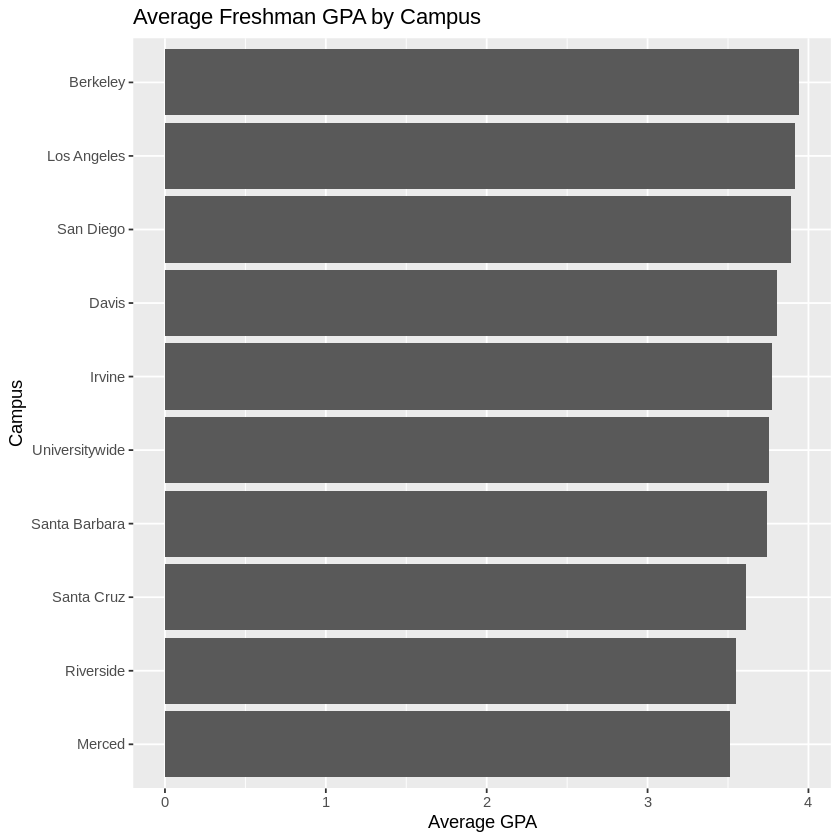

In [39]:
ggplot(gpa_by_campus, aes(x = reorder(Campus, AverageGPA), y = AverageGPA)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(title = "Average Freshman GPA by Campus", x = "Campus", y = "Average GPA")


In [ ]:
latest_year <- max(hs_data$`Fall.Term`)

admissions_by_demo <- hs_data %>%
  filter(`Fall.Term` == latest_year, `Measure.Names` == "adm") %>%
  group_by(`Uad.Uc.Ethn.6.Cat`) %>%
  summarise(TotalAdmissions = sum(`Measure.Values`, na.rm = TRUE)) %>%
  arrange(desc(TotalAdmissions))


Total Admissions by Demographic Group

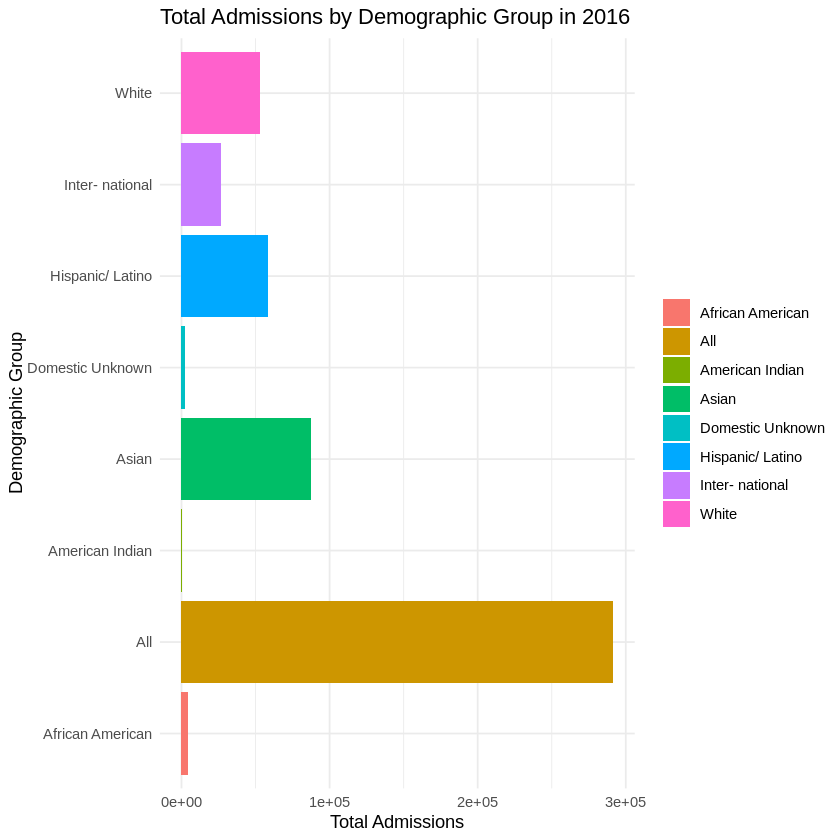

In [57]:
ggplot(admissions_by_demo, aes(x = `Uad.Uc.Ethn.6.Cat`, y = TotalAdmissions, fill = `Uad.Uc.Ethn.6.Cat`)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(title = paste("Total Admissions by Demographic Group in", latest_year),
       x = "Demographic Group",
       y = "Total Admissions") +
  theme_minimal() +
  theme(legend.title = element_blank())

